<a href="https://colab.research.google.com/github/cukri/Autoencoder_anomaly/blob/main/Autoencoder_anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import Model

In [ ]:
df = pd.read_csv('KDD_Cup_1999.csv')
df_v2 = pd.read_csv('KDD_Cup_1999.csv')
df_v3 = pd.read_csv('KDD_Cup_1999.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [ ]:
print(df.head())

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979302,707.746472,0.0,0.00,0.0,0.00,58329.0
src_bytes,494021.0,3025.610296,988218.101045,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494021.0,868.532425,33040.001252,0.0,0.00,0.0,0.00,5155468.0
land,494021.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494021.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494021.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494021.0,0.148247,0.355345,0.0,0.00,0.0,0.00,1.0
num_compromised,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0


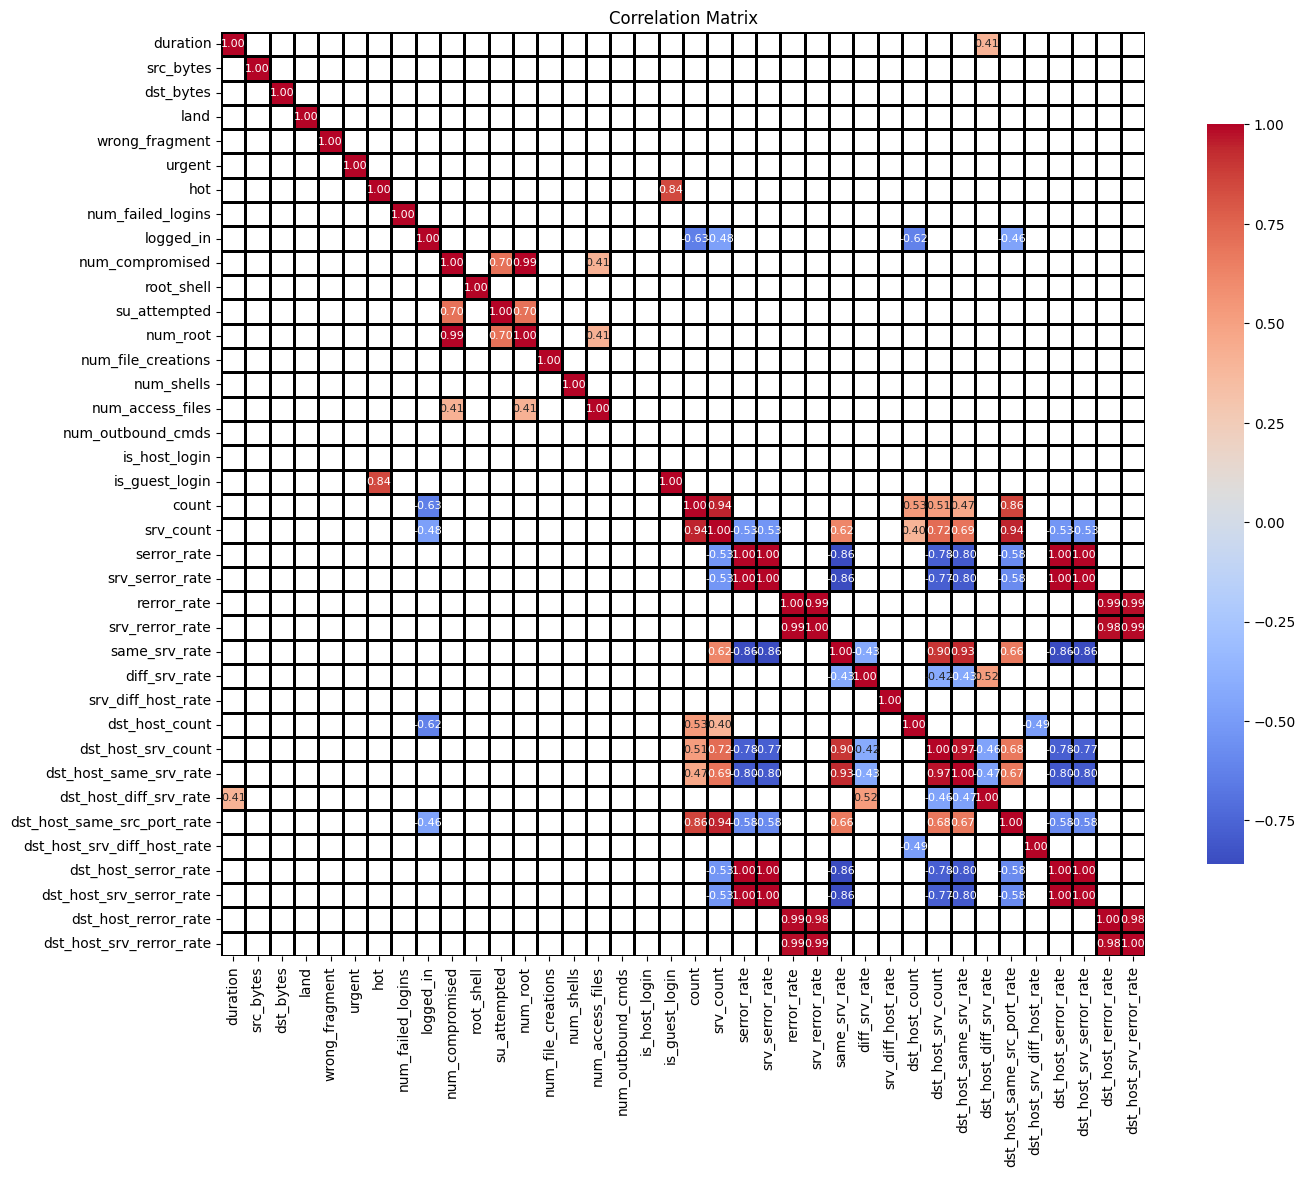

In [ ]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8}, linewidths=1,
            linecolor='black', annot_kws={"size": 8}, mask=correlation_matrix.abs() < 0.4)
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

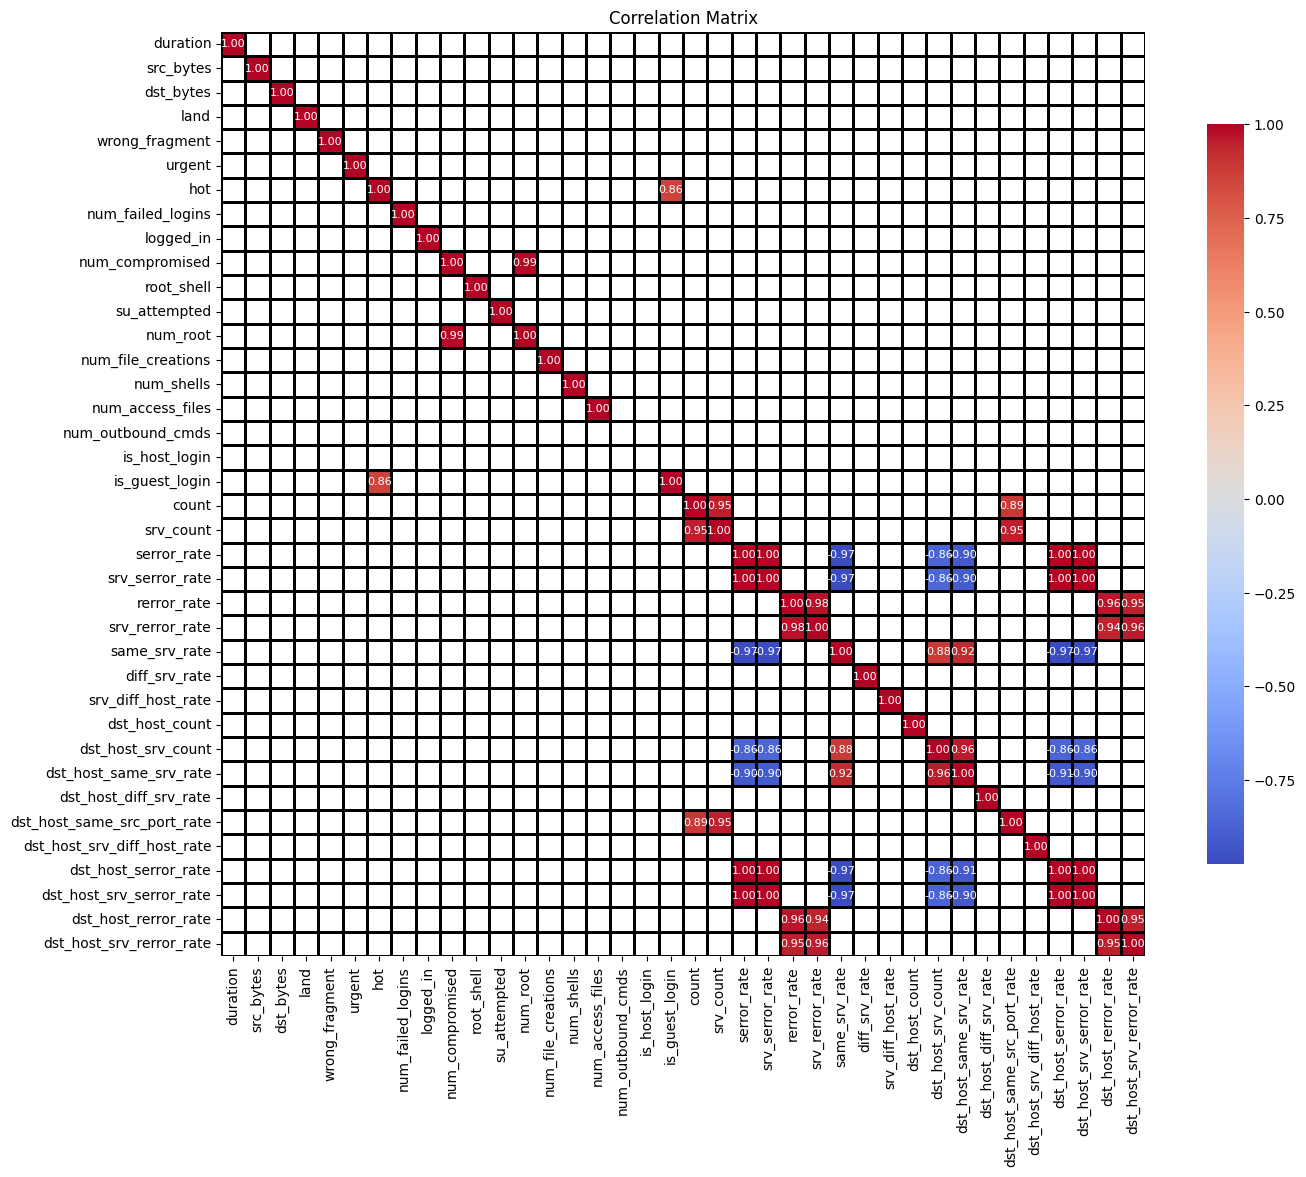

In [ ]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8}, linewidths=1,
            linecolor='black', annot_kws={"size": 8}, mask=correlation_matrix.abs() < 0.8)
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


count ma 0.94 z srv_count i 0.86 z dst_host_same_src_port_rate
srv_count ma 0.94 z count i dst_host_same_src_port_rate
Serror rate ma korelacje 1.0 z srv_serror_rate, dst_host_serror_rate, dst_host_srv_serror_rate
rerror_rate ma 0.99 z srv_rerror_rate oraz dst_host_rerror rate i dst_host_srv_rerror_rate
same_srv_rate ma -0.86 z serror_rate oraz srv_serror_rate, dst_host_serror_rate, dst_host_srv_rerror_rate i 0.90 z dst_host_srv_count oraz dst_host_same_srv_rate
dst_host_srv_count ma 0.90 z same_srv_rate i 0.97 z dst_host_same_srv_rate
czemu num_outbound_cmds i is_host_login nie maja 1.0?



In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

Missing values in each column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rat

Czy ta ilość zduplikowanych wierszy jest błędem? (UPDATE te wiersze reprezentują rzeczywistą ilość ruchu, przede wszystkim ataków więc nie należy ich usuwać)

In [ ]:
df['serror_rate_mean'] = df[['serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']].mean(axis=1)
df = df.drop(columns=['serror_rate', 'srv_serror_rate', 'dst_host_serror_rate','dst_host_srv_serror_rate'])

df['rerror_rate_mean'] = df[['rerror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']].mean(axis=1)
df = df.drop(columns=['rerror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'])

df = df.drop(columns=['num_outbound_cmds', 'is_host_login',
                      'srv_count', 'num_root','dst_host_srv_count',
                      'same_srv_rate','src_bytes','dst_bytes','land',
                      'wrong_fragment','urgent'
])
df.head()


,duration,protocol_type,service,flag,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,outcome,serror_rate_mean,rerror_rate_mean
0,0,tcp,http,SF,0,0,1,0,0,0,...,0.0,0.0,9,1.0,0.0,0.11,0.0,normal,0.0,0.0
1,0,tcp,http,SF,0,0,1,0,0,0,...,0.0,0.0,19,1.0,0.0,0.05,0.0,normal,0.0,0.0
2,0,tcp,http,SF,0,0,1,0,0,0,...,0.0,0.0,29,1.0,0.0,0.03,0.0,normal,0.0,0.0
3,0,tcp,http,SF,0,0,1,0,0,0,...,0.0,0.0,39,1.0,0.0,0.03,0.0,normal,0.0,0.0
4,0,tcp,http,SF,0,0,1,0,0,0,...,0.0,0.0,49,1.0,0.0,0.02,0.0,normal,0.0,0.0


usuniecie:
1. num_outbound_cmds i is_host_login, ponieważ nie mają danych
2. srv_count interesuje nas mniej niż count ponieważ chcemy odnajdywać jak najwięcej ataków na całą sieć a nie konkretne serwisy,
3. num_root reprezentuje wylacznie ataki z podniesieniem uprawnien a chcemy rozważać również inne metody ataków(ta kolumna ma korelacje 0.99 z num_compromised, więc wystarczy jedna)
4. dst_host_srv_count poniewaz dst_host_same_srv_rate reprezentuje te same dane w znormalizowanej formie
5. Usuwam same_srv_rate, zostawiam dst_host_same_srv_rate – ponieważ model powinien lepiej wychwytywać anomalie bazujące na stabilnych wzorcach ruchu sieciowego.
6.src_bytes,dst_bytes,land,wrong_fragment,urgent - nie wykazują żadnych istotnytch korelacji z innymi cechami

In [ ]:
numerical_columns_u = df.select_dtypes(include=['int64', 'float64']).columns

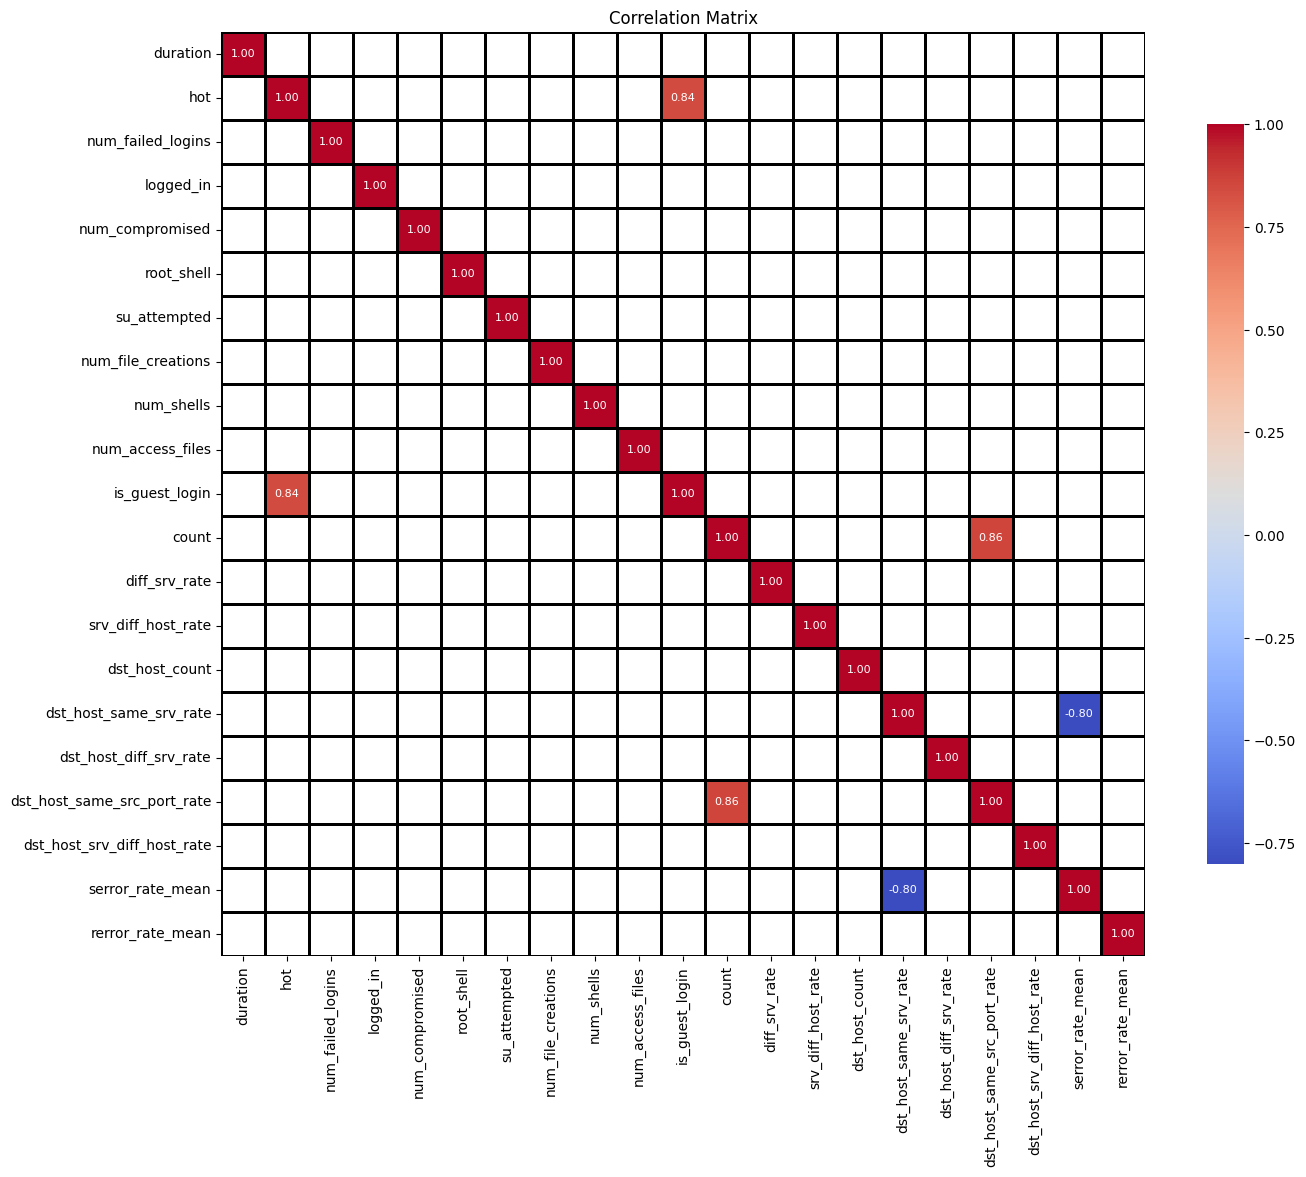

In [ ]:
correlation_matrix = df[numerical_columns_u].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8}, linewidths=1,
            linecolor='black', annot_kws={"size": 8}, mask=correlation_matrix.abs() < 0.8)
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


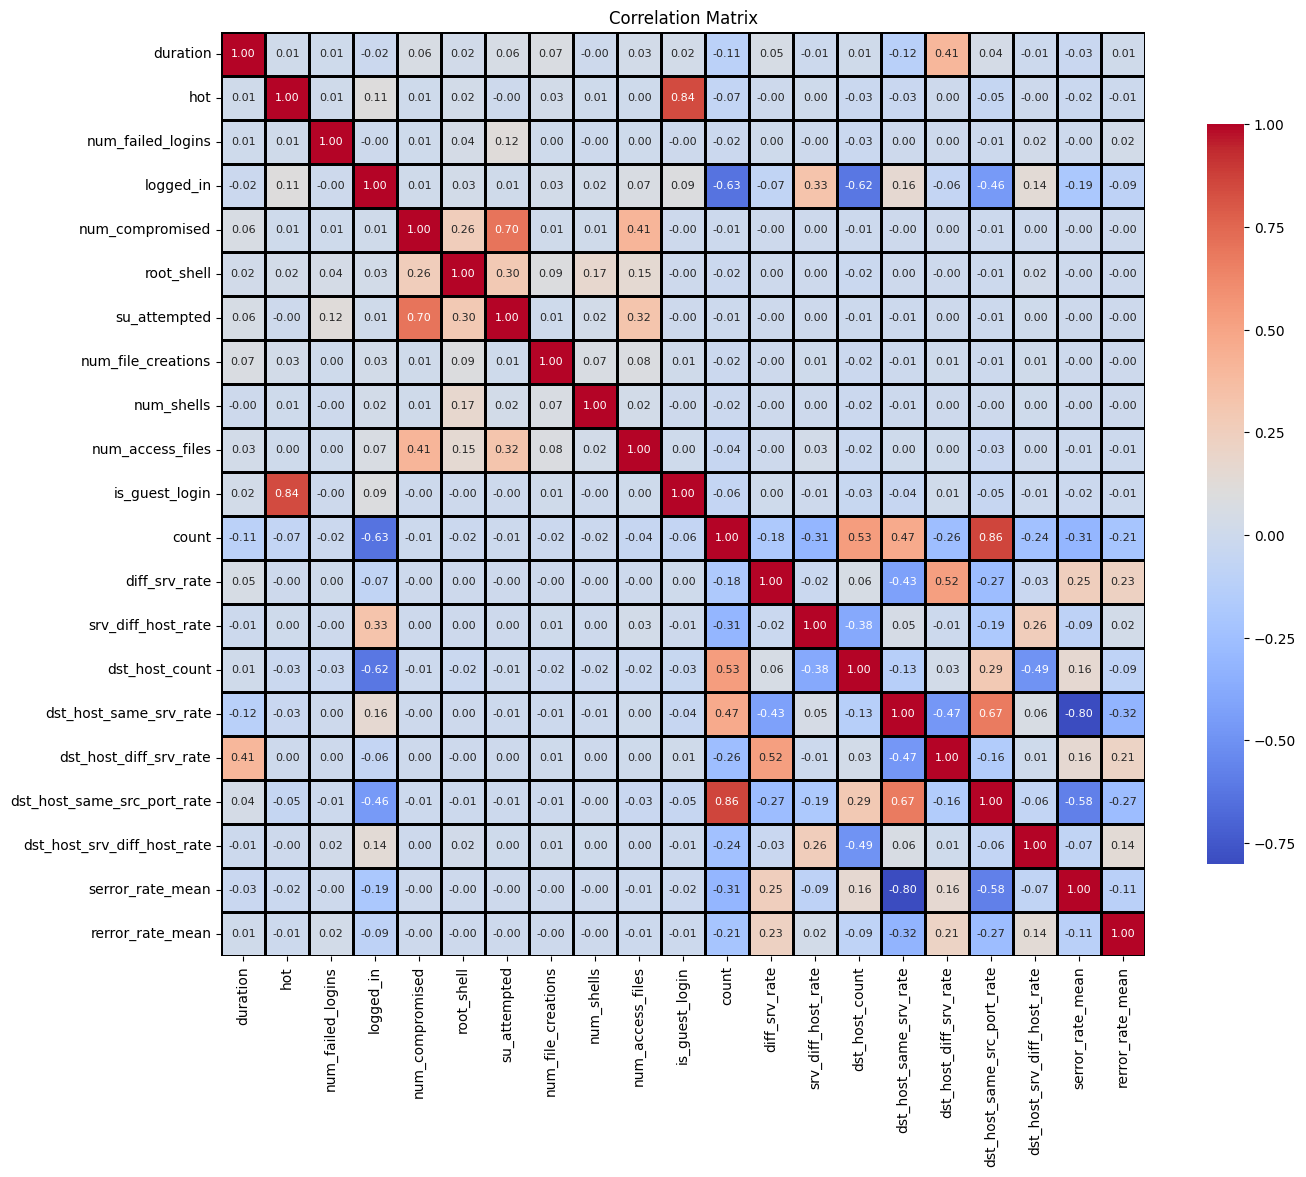

In [ ]:
numerical_columns_u = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns_u].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8}, linewidths=1,
            linecolor='black', annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
print(df.columns)
print(df_v2.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'outcome',
       'serror_rate_mean', 'rerror_rate_mean'],
      dtype='object')
Index(['duration', 'protocol_type', 'service', 'flag', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'outcome',
       'serror_rate_mean', 'rerror_rate_

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
skewness = df[numeric_cols].apply(skew)
kurt = df[numeric_cols].apply(kurtosis)

distribution_params = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurt})
print("\nParametry rozkładów:\n", distribution_params)



Parametry rozkładów:
                                Skewness       Kurtosis
duration                      25.864779     942.520692
hot                           32.629046    1127.005818
num_failed_logins            160.802128   37221.220352
logged_in                      1.979788       1.919560
num_compromised              417.528960  188119.443720
root_shell                    94.758641    8977.200111
su_attempted                 230.978976   55984.174689
num_file_creations           192.334182   43583.453805
num_shells                   108.873887   13169.165456
num_access_files              61.201266    7571.327426
is_guest_login                26.799252     716.199929
count                         -0.542004      -1.472207
diff_srv_rate                  9.642397     105.111827
srv_diff_host_rate             5.868993      35.114569
dst_host_count                -2.730679       5.852796
dst_host_same_srv_rate        -1.125530      -0.687254
dst_host_diff_srv_rate         6.857148   

In [ ]:
print(numerical_columns_u)

Index(['duration', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'serror_rate_mean', 'rerror_rate_mean'],
      dtype='object')


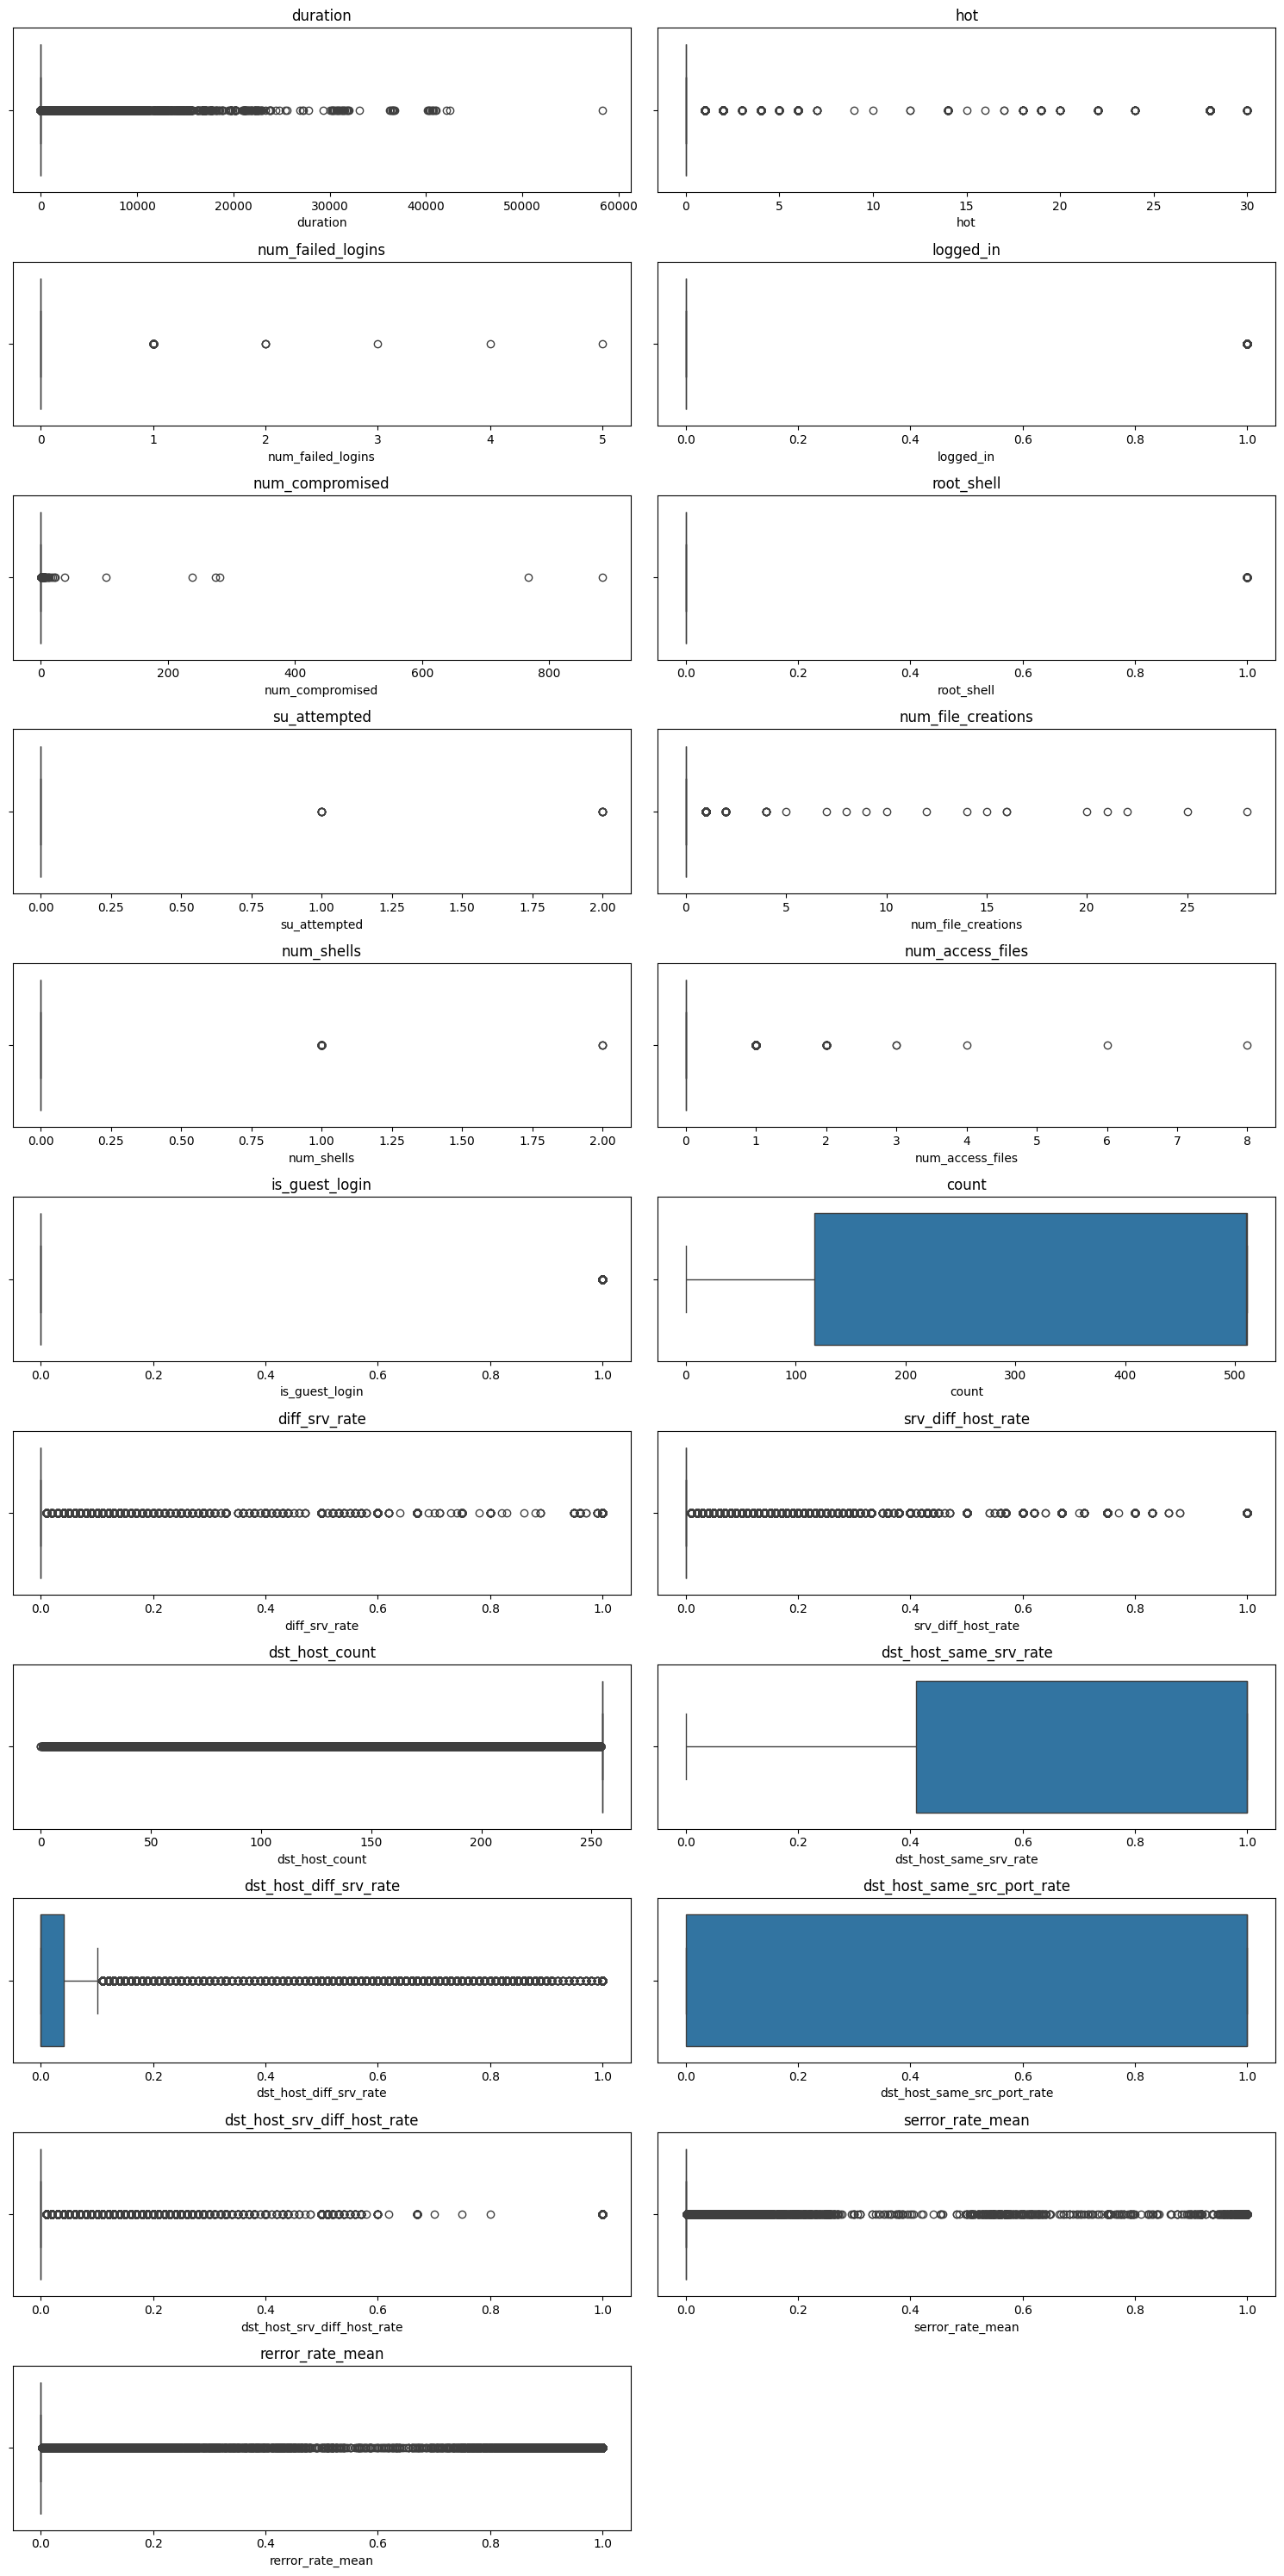

In [ ]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(numerical_columns_u, 1):
    plt.subplot(len(numerical_columns_u) // 2 + 1, 2, i)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979302,707.746472,0.0,0.00,0.0,0.00,58329.0
hot,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494021.0,0.148247,0.355345,0.0,0.00,0.0,0.00,1.0
num_compromised,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0
root_shell,494021.0,0.000111,0.010551,0.0,0.00,0.0,0.00,1.0
su_attempted,494021.0,0.000036,0.007793,0.0,0.00,0.0,0.00,2.0
num_file_creations,494021.0,0.001083,0.096416,0.0,0.00,0.0,0.00,28.0
num_shells,494021.0,0.000109,0.011020,0.0,0.00,0.0,0.00,2.0
num_access_files,494021.0,0.001008,0.036482,0.0,0.00,0.0,0.00,8.0


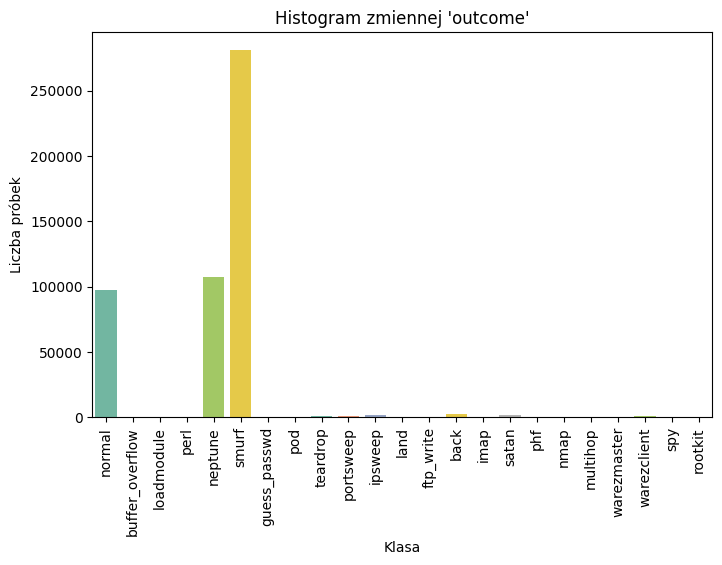

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="outcome", hue="outcome", palette="Set2", legend=False)
plt.title("Histogram zmiennej 'outcome'")
plt.xlabel("Klasa")
plt.ylabel("Liczba próbek")
plt.xticks(rotation=90)
plt.show()


In [ ]:
print(df['outcome'].unique())
print(df['outcome'].nunique())
print(df['outcome'].value_counts())

['normal' 'buffer_overflow' 'loadmodule' 'perl' 'neptune' 'smurf'
 'guess_passwd' 'pod' 'teardrop' 'portsweep' 'ipsweep' 'land' 'ftp_write'
 'back' 'imap' 'satan' 'phf' 'nmap' 'multihop' 'warezmaster' 'warezclient'
 'spy' 'rootkit']
23
outcome
smurf              280790
neptune            107201
normal              97278
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
outcome                        0
serror_rate_mean               0
rerror_rate_mean               0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print(df.shape)
print(df_v2.shape)

(494021, 25)
(494021, 25)


In [ ]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,20107.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.00
src_bytes,20107.0,262.045109,51.830416,140.0,218.0,248.00,307.00,494.00
dst_bytes,20107.0,1851.242652,1670.804112,57.0,580.0,1337.00,2522.00,7478.00
land,20107.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.00
wrong_fragment,20107.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.00
urgent,20107.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.00
hot,20107.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.00
num_failed_logins,20107.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.00
logged_in,20107.0,1.000000,0.000000,1.0,1.0,1.00,1.00,1.00
num_compromised,20107.0,0.000000,0.000000,0.0,0.0,0.00,0.00,0.00


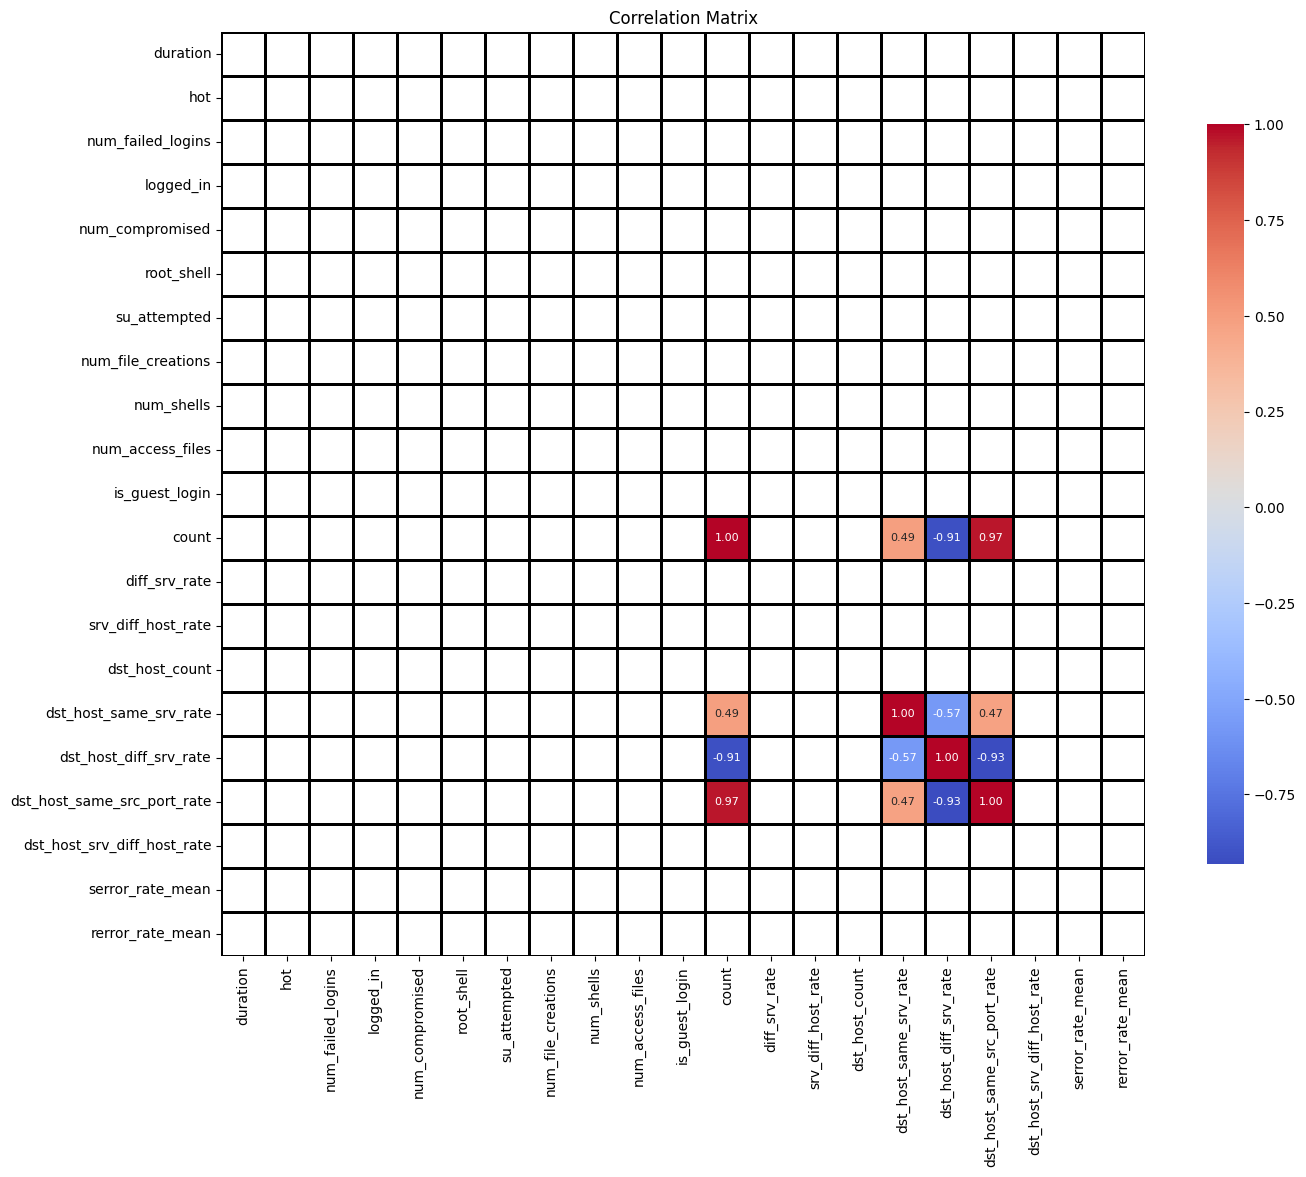

In [ ]:
numerical_columns_u = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_cleaned[numerical_columns_u].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8}, linewidths=1,
            linecolor='black', annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Nie możemy usuwać danych z outlierami ponieważ naszym celem jest właśnie znalezienie zachowań atypowych w sieci, które bedą sie cechować danymi odbiegającymi od normalnych.

In [ ]:
print(df.nunique())

duration                       2495
protocol_type                     3
service                          66
flag                             11
hot                              22
num_failed_logins                 6
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_file_creations               18
num_shells                        3
num_access_files                  7
is_guest_login                    2
count                           490
diff_srv_rate                    78
srv_diff_host_rate               64
dst_host_count                  256
dst_host_same_srv_rate          101
dst_host_diff_srv_rate          101
dst_host_same_src_port_rate     101
dst_host_srv_diff_host_rate      65
outcome                          23
serror_rate_mean                386
rerror_rate_mean                600
dtype: int64


In [ ]:
numerical_columns = [
    "duration", "hot", "num_failed_logins", "num_compromised",
    "num_file_creations", "num_shells", "num_access_files",
    "count", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "serror_rate_mean", "rerror_rate_mean"
]


log_transform_cols = [
    "duration", "hot", "num_failed_logins", "num_compromised",
    "num_file_creations", "num_shells", "num_access_files",
    "dst_host_srv_diff_host_rate"
]


df_log_transformed = df[log_transform_cols].apply(np.log1p)

df_combined = df[numerical_columns].copy()
df_combined[log_transform_cols] = df_log_transformed

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_combined), columns=numerical_columns)

categorical_columns = ["protocol_type", "service", "flag", "logged_in", "root_shell", "su_attempted", "is_guest_login"]
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_cat = encoder.fit_transform(df[categorical_columns])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns))

df_prep = pd.concat([df_scaled, encoded_cat_df, df["outcome"].reset_index(drop=True)], axis=1)

print(df_prep.head())
print(df_prep.shape)

   duration  hot  num_failed_logins  num_compromised  num_file_creations  \
0       0.0  0.0                0.0              0.0                 0.0   
1       0.0  0.0                0.0              0.0                 0.0   
2       0.0  0.0                0.0              0.0                 0.0   
3       0.0  0.0                0.0              0.0                 0.0   
4       0.0  0.0                0.0              0.0                 0.0   

   num_shells  num_access_files     count  diff_srv_rate  srv_diff_host_rate  \
0         0.0               0.0  0.015656            0.0                 0.0   
1         0.0               0.0  0.015656            0.0                 0.0   
2         0.0               0.0  0.015656            0.0                 0.0   
3         0.0               0.0  0.011742            0.0                 0.0   
4         0.0               0.0  0.011742            0.0                 0.0   

   ...  flag_S2  flag_S3  flag_SF  flag_SH  logged_in_1  root_

In [ ]:
df_prep["outcome"] = df_prep["outcome"].map(lambda x: 0 if x == "normal" else 1)

df_train, df_test = train_test_split(df_prep, test_size=0.2, random_state=42)

df_train_normal = df_train[df_train['outcome'] == 0].drop(columns=['outcome'])
df_train_anom = df_train[df_train['outcome'] == 1].drop(columns=['outcome'])

df_test_normal = df_test[df_test['outcome'] == 0].drop(columns=['outcome'])
df_test_anom = df_test[df_test['outcome'] == 1].drop(columns=['outcome'])


In [ ]:
print(df_train_normal.columns)
print(len(df_train_normal.columns))

Index(['duration', 'hot', 'num_failed_logins', 'num_compromised',
       'num_file_creations', 'num_shells', 'num_access_files', 'count',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'serror_rate_mean', 'rerror_rate_mean', 'protocol_type_tcp',
       'protocol_type_udp', 'service_X11', 'service_Z39_50', 'service_auth',
       'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf',
       'service_daytime', 'service_discard', 'service_domain',
       'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
       'service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_hostnames',
       'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap',
       'service_klogin', 'service_kshell', 'service_ldap', 'service_link',
       'service_l

In [ ]:
X_train_normal = df_train_normal.values
X_test_normal = df_test_normal.values

X_train_anom = df_train_anom.values
X_test_anom = df_test_anom.values

input_dim = X_train_normal.shape[1]
print(f"Liczba cech wejściowych: {input_dim}")

Liczba cech wejściowych: 99


In [ ]:
input_layer = layers.Input(shape=(input_dim,))

encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dropout(0.2)(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dropout(0.2)(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)

decoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dropout(0.2)(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
optimizer = RMSprop(learning_rate=0.001)

autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

autoencoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 99)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 128)                 │          12,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 99)                  │          12,771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,547 (134.95 KB)

 Trainable params: 34,547 (134.95 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=30,
    batch_size=256,
    validation_data=(X_test_normal, X_test_normal),
    callbacks=[early_stopping]
)

Epoch 1/30
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2131 - val_loss: 0.0552
Epoch 2/30
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0490 - val_loss: 0.0354
Epoch 3/30
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0361 - val_loss: 0.0264
Epoch 4/30
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0283 - val_loss: 0.0233
Epoch 5/30
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0247 - val_loss: 0.0208
Epoch 6/30
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0228 - val_loss: 0.0194
Epoch 7/30
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0212 - val_loss: 0.0183
Epoch 8/30
305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0201 - val_loss: 0.0179
Epoch 9/30
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0196 - val_loss: 0.0182
Epoch 10/30
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0191 - val_loss: 0.0171
Epoch 11/30
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188 - val_loss: 0.0173
Epoch 12/30
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/st

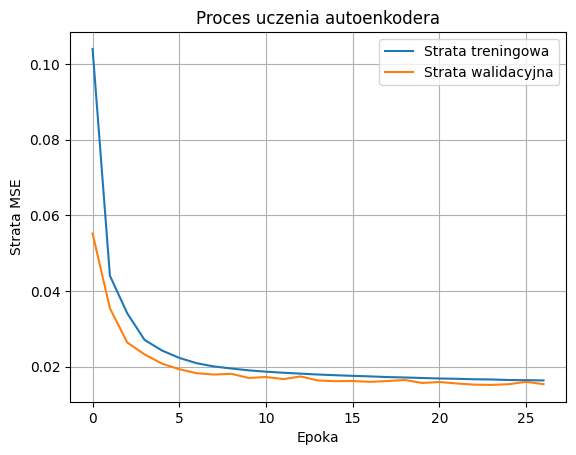

In [ ]:
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata MSE')
plt.title('Proces uczenia autoenkodera')
plt.legend()
plt.grid()
plt.show()

2436/2436 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
605/605 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
9916/9916 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
2483/2483 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


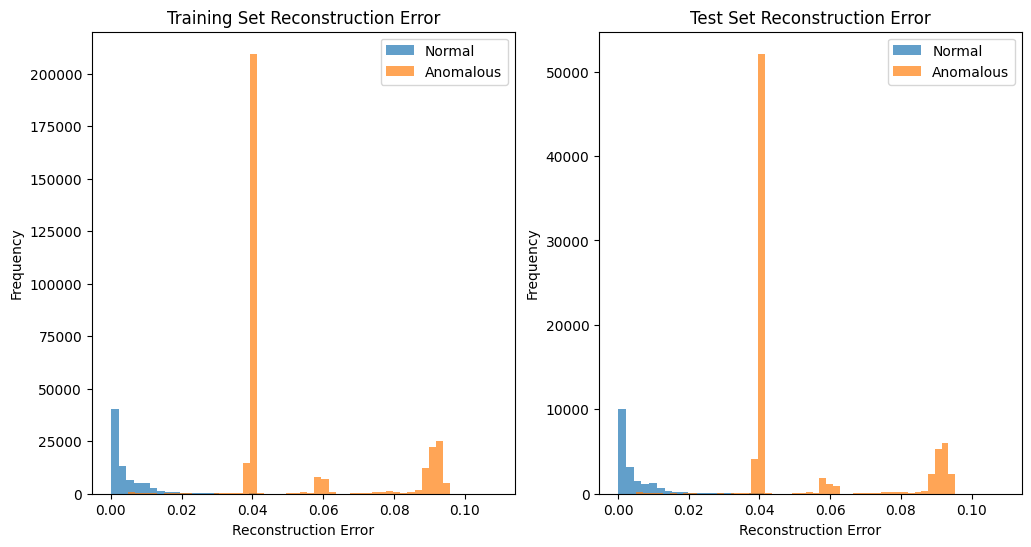

Confusion Matrix:
 [[ 74028   3897]
 [  2304 314987]]


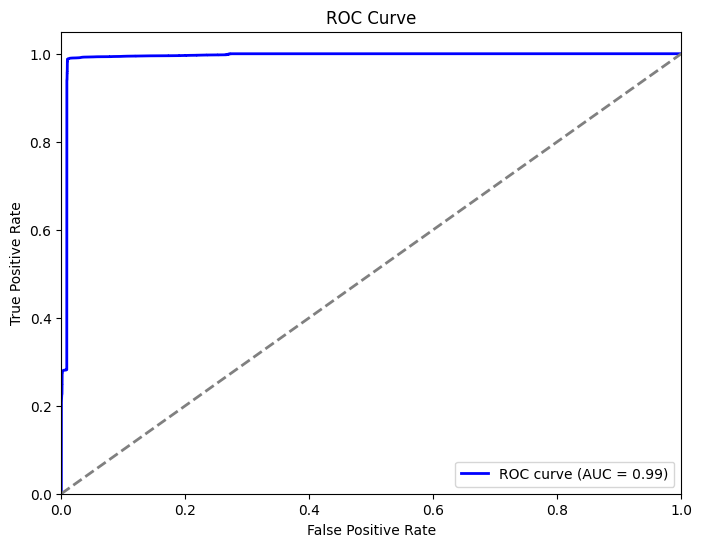

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

train_reconstruction_error_normal = np.mean(np.abs(X_train_normal - autoencoder.predict(X_train_normal)), axis=1)
test_reconstruction_error_normal = np.mean(np.abs(X_test_normal - autoencoder.predict(X_test_normal)), axis=1)

train_reconstruction_error_anom = np.mean(np.abs(X_train_anom - autoencoder.predict(X_train_anom)), axis=1)
test_reconstruction_error_anom = np.mean(np.abs(X_test_anom - autoencoder.predict(X_test_anom)), axis=1)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_reconstruction_error_normal, bins=50, alpha=0.7, label='Normal')
plt.hist(train_reconstruction_error_anom, bins=50, alpha=0.7, label='Anomalous')
plt.title("Training Set Reconstruction Error")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(test_reconstruction_error_normal, bins=50, alpha=0.7, label='Normal')
plt.hist(test_reconstruction_error_anom, bins=50, alpha=0.7, label='Anomalous')
plt.title("Test Set Reconstruction Error")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()

plt.show()


threshold = np.percentile(train_reconstruction_error_normal, 95)


y_true = np.concatenate([np.zeros(len(X_train_normal)), np.ones(len(X_train_anom))])
y_pred = np.concatenate([train_reconstruction_error_normal, train_reconstruction_error_anom])
y_pred_labels = (y_pred > threshold).astype(int)

cm = confusion_matrix(y_true, y_pred_labels)
print("Confusion Matrix:\n", cm)

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
df_v2['serror_rate_mean'] = df_v2[['serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']].mean(axis=1)
df_v2 = df_v2.drop(columns=['serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate'])

df_v2['rerror_rate_mean'] = df_v2[['rerror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']].mean(axis=1)
df_v2 = df_v2.drop(columns=['rerror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'])

df_v2 = df_v2.drop(columns=['num_outbound_cmds', 'is_host_login',
                            'srv_count', 'num_root', 'dst_host_srv_count',
                            'same_srv_rate', 'src_bytes', 'dst_bytes', 'land',
                            'wrong_fragment', 'urgent'])

df_v2.head()


,duration,protocol_type,service,flag,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,outcome,serror_rate_mean,rerror_rate_mean
0,0,tcp,http,SF,0,0,1,0,0,0,...,0.0,0.0,9,1.0,0.0,0.11,0.0,normal,0.0,0.0
1,0,tcp,http,SF,0,0,1,0,0,0,...,0.0,0.0,19,1.0,0.0,0.05,0.0,normal,0.0,0.0
2,0,tcp,http,SF,0,0,1,0,0,0,...,0.0,0.0,29,1.0,0.0,0.03,0.0,normal,0.0,0.0
3,0,tcp,http,SF,0,0,1,0,0,0,...,0.0,0.0,39,1.0,0.0,0.03,0.0,normal,0.0,0.0
4,0,tcp,http,SF,0,0,1,0,0,0,...,0.0,0.0,49,1.0,0.0,0.02,0.0,normal,0.0,0.0


In [ ]:
numerical_columns = [
    "duration", "hot", "num_failed_logins", "num_compromised",
    "num_file_creations", "num_shells", "num_access_files",
    "count", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "serror_rate_mean", "rerror_rate_mean"
]

categorical_columns = ["protocol_type", "service", "flag", "logged_in",
                       "root_shell", "su_attempted", "is_guest_login"]

scaler = MinMaxScaler()
df_v2_scaled = pd.DataFrame(scaler.fit_transform(df_v2[numerical_columns]), columns=numerical_columns)


encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_cat = encoder.fit_transform(df_v2[categorical_columns])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns))

df_v2_prep = pd.concat([df_v2_scaled, encoded_cat_df, df_v2["outcome"].reset_index(drop=True)], axis=1)

print(df_v2_prep.head())
print(df_v2_prep.shape)

   duration  hot  num_failed_logins  num_compromised  num_file_creations  \
0       0.0  0.0                0.0              0.0                 0.0   
1       0.0  0.0                0.0              0.0                 0.0   
2       0.0  0.0                0.0              0.0                 0.0   
3       0.0  0.0                0.0              0.0                 0.0   
4       0.0  0.0                0.0              0.0                 0.0   

   num_shells  num_access_files     count  diff_srv_rate  srv_diff_host_rate  \
0         0.0               0.0  0.015656            0.0                 0.0   
1         0.0               0.0  0.015656            0.0                 0.0   
2         0.0               0.0  0.015656            0.0                 0.0   
3         0.0               0.0  0.011742            0.0                 0.0   
4         0.0               0.0  0.011742            0.0                 0.0   

   ...  flag_S2  flag_S3  flag_SF  flag_SH  logged_in_1  root_

In [ ]:
print(df_v2_prep.columns)

Index(['duration', 'hot', 'num_failed_logins', 'num_compromised',
       'num_file_creations', 'num_shells', 'num_access_files', 'count',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'serror_rate_mean', 'rerror_rate_mean', 'protocol_type_tcp',
       'protocol_type_udp', 'service_X11', 'service_Z39_50', 'service_auth',
       'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf',
       'service_daytime', 'service_discard', 'service_domain',
       'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
       'service_efs', 'service_exec', 'service_finger', 'service_ftp',
       'service_ftp_data', 'service_gopher', 'service_hostnames',
       'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap',
       'service_klogin', 'service_kshell', 'service_ldap', 'service_link',
       'service_l

In [ ]:
from sklearn.model_selection import train_test_split

df_v2_prep["outcome"] = df_v2_prep["outcome"].map(lambda x: 0 if x == "normal" else 1)

df_v2_train, df_v2_test = train_test_split(df_v2_prep, test_size=0.2, random_state=42)

df_v2_train_normal = df_v2_train[df_v2_train['outcome'] == 0].drop(columns=['outcome'])
df_v2_train_anom = df_v2_train[df_v2_train['outcome'] == 1].drop(columns=['outcome'])

df_v2_test_normal = df_v2_test[df_v2_test['outcome'] == 0].drop(columns=['outcome'])
df_v2_test_anom = df_v2_test[df_v2_test['outcome'] == 1].drop(columns=['outcome'])

X_train_normal = df_v2_train_normal.values
X_test_normal = df_v2_test_normal.values

X_train_anom = df_v2_train_anom.values
X_test_anom = df_v2_test_anom.values

input_dim = X_train_normal.shape[1]
print(f"Liczba cech wejściowych: {input_dim}")


Liczba cech wejściowych: 99


In [ ]:
from tensorflow.keras import layers, regularizers
input_layer = layers.Input(shape=(input_dim,))

# Encoder
encoded = layers.Dense(64, kernel_regularizer=regularizers.l2(0.00005))(input_layer)
encoded = layers.BatchNormalization()(encoded)
encoded = layers.Activation('relu')(encoded)
encoded = layers.Dropout(0.2)(encoded)

encoded = layers.Dense(32, kernel_regularizer=regularizers.l2(0.00005))(encoded)
encoded = layers.BatchNormalization()(encoded)
encoded = layers.Activation('relu')(encoded)
encoded = layers.Dropout(0.2)(encoded)

encoded = layers.Dense(8, kernel_regularizer=regularizers.l2(0.00005))(encoded)
encoded = layers.BatchNormalization()(encoded)
encoded = layers.Activation('relu')(encoded)

# Decoder
decoded = layers.Dense(8, kernel_regularizer=regularizers.l2(0.00005))(encoded)
decoded = layers.BatchNormalization()(decoded)
decoded = layers.Activation('relu')(decoded)

decoded = layers.Dense(32, kernel_regularizer=regularizers.l2(0.00005))(decoded)
decoded = layers.BatchNormalization()(decoded)
decoded = layers.Activation('relu')(decoded)
decoded = layers.Dropout(0.2)(decoded)

decoded = layers.Dense(64, kernel_regularizer=regularizers.l2(0.00005))(decoded)
decoded = layers.BatchNormalization()(decoded)
decoded = layers.Activation('relu')(decoded)

decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder_2 = Model(input_layer, decoded)
optimizer = Adam(learning_rate=0.0005)

autoencoder_2.compile(optimizer=optimizer, loss='binary_crossentropy')

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

autoencoder_2.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 99)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           6,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │              

 Total params: 18,483 (72.20 KB)

 Trainable params: 18,067 (70.57 KB)

 Non-trainable params: 416 (1.62 KB)

In [ ]:

history = autoencoder_2.fit(
    X_train_normal, X_train_normal,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_normal, X_test_normal),
    callbacks=[early_stopping]
)

Epoch 1/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.2228 - val_loss: 0.0282
Epoch 2/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0278 - val_loss: 0.0206
Epoch 3/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0216 - val_loss: 0.0171
Epoch 4/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0187 - val_loss: 0.0153
Epoch 5/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0171 - val_loss: 0.0145
Epoch 6/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0161 - val_loss: 0.0139
Epoch 7/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0155 - val_loss: 0.0135
Epoch 8/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0150 - val_loss: 0.0132
Epoch 9/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0148 - val_loss: 0.0129
Epoch 10/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0146 - val_loss: 0.0127
Epoch 11/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0143 - val_loss: 0.0126
Epoch 12/100
1218

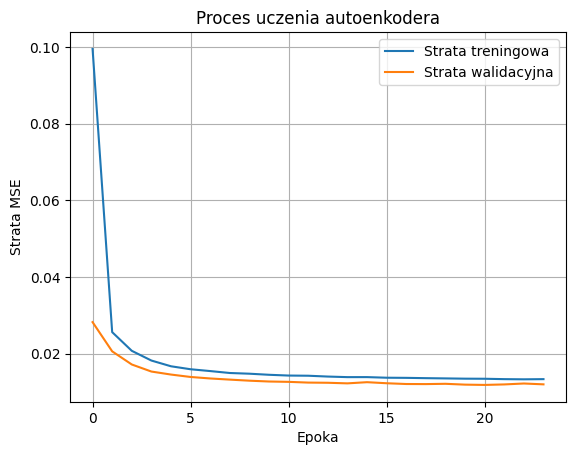

In [ ]:
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata MSE')
plt.title('Proces uczenia autoenkodera')
plt.legend()
plt.grid()
plt.show()

2436/2436 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
605/605 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
9916/9916 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
2483/2483 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


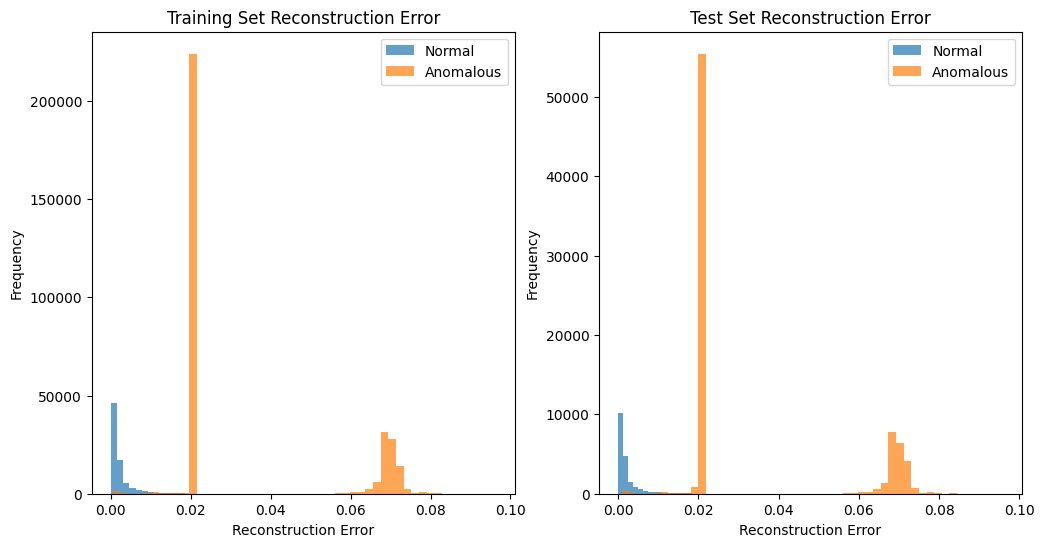

Confusion Matrix:
 [[ 76366   1559]
 [  2821 314470]]


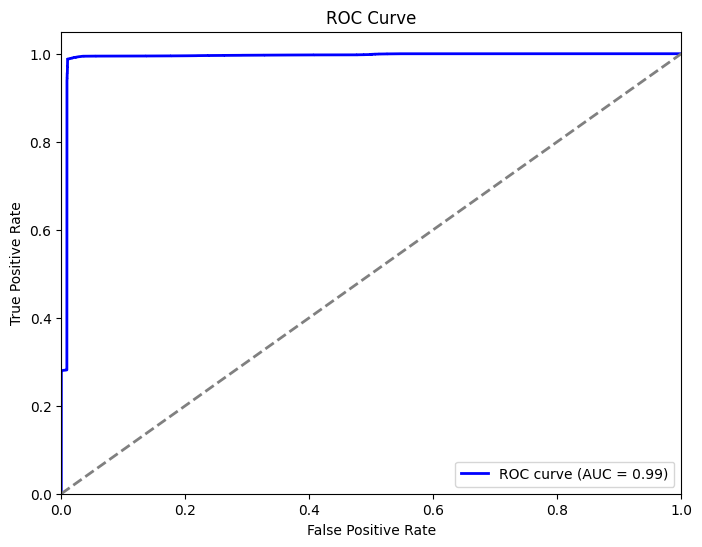

Precision: 0.9951
Recall: 0.9911


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score

train_reconstruction_error_normal = np.mean(np.abs(X_train_normal - autoencoder_2.predict(X_train_normal)), axis=1)
test_reconstruction_error_normal = np.mean(np.abs(X_test_normal - autoencoder_2.predict(X_test_normal)), axis=1)

train_reconstruction_error_anom = np.mean(np.abs(X_train_anom - autoencoder_2.predict(X_train_anom)), axis=1)
test_reconstruction_error_anom = np.mean(np.abs(X_test_anom - autoencoder_2.predict(X_test_anom)), axis=1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(train_reconstruction_error_normal, bins=50, alpha=0.7, label='Normal')
plt.hist(train_reconstruction_error_anom, bins=50, alpha=0.7, label='Anomalous')
plt.title("Training Set Reconstruction Error")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(test_reconstruction_error_normal, bins=50, alpha=0.7, label='Normal')
plt.hist(test_reconstruction_error_anom, bins=50, alpha=0.7, label='Anomalous')
plt.title("Test Set Reconstruction Error")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()

plt.show()

threshold = np.percentile(train_reconstruction_error_normal, 98)

y_true = np.concatenate([np.zeros(len(X_train_normal)), np.ones(len(X_train_anom))]
y_pred = np.concatenate([train_reconstruction_error_normal, train_reconstruction_error_anom])
y_pred_labels = (y_pred > threshold).astype(int)

cm = confusion_matrix(y_true, y_pred_labels)
print("Confusion Matrix:\n", cm)

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

precision = precision_score(y_true, y_pred_labels)
recall = recall_score(y_true, y_pred_labels)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Model 2 przyjmuje delikatnie lepsze wartosci
Metryka	Pierwszy model	Drugi model
Czułość (Recall, TPR)	99.20%	99.31%
Specyficzność (TNR)	94.83%	95.01%
FPR (False Positive Rate)	5.17%	4.99%
FNR (False Negative Rate)	0.80%	0.69%

MODEL V3 - PROBA STWORZENIA MODELU BEZ USUWANIA DANYCH

In [ ]:
numerical_columns = df_v3.select_dtypes(include=['int64', 'float64']).columns
df_v3[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979302,707.746472,0.0,0.00,0.0,0.00,58329.0
src_bytes,494021.0,3025.610296,988218.101045,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494021.0,868.532425,33040.001252,0.0,0.00,0.0,0.00,5155468.0
land,494021.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494021.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494021.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494021.0,0.148247,0.355345,0.0,0.00,0.0,0.00,1.0
num_compromised,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0


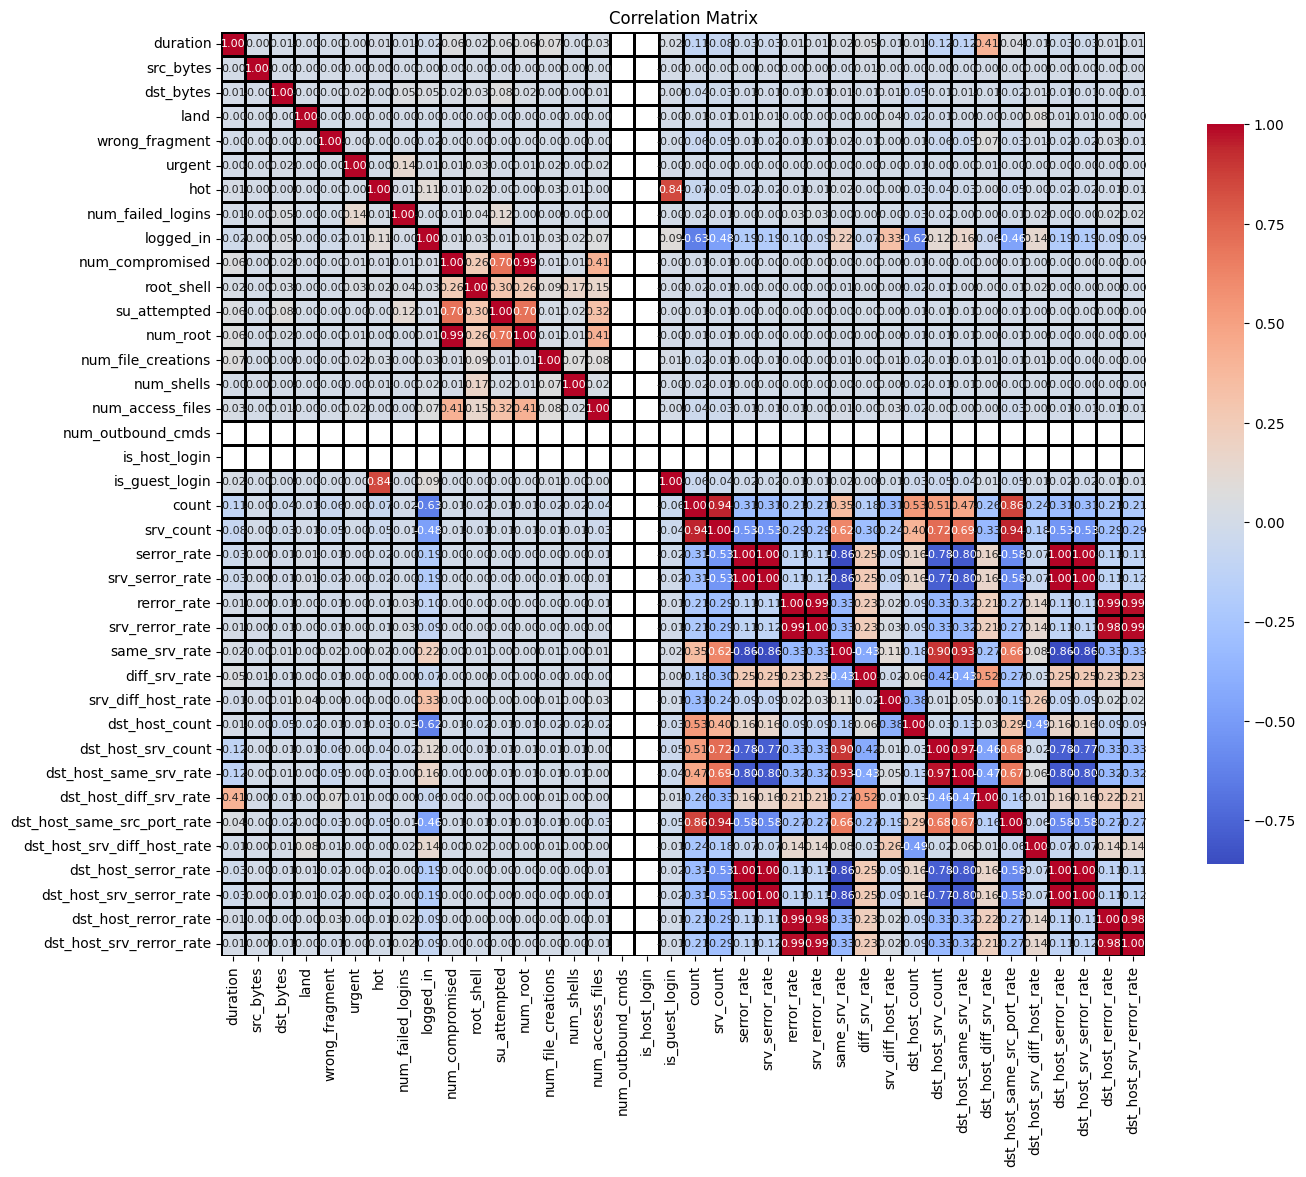

In [ ]:
correlation_matrix = df_v3[numerical_columns].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8}, linewidths=1,
            linecolor='black', annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
df_v3 = pd.read_csv('KDD_Cup_1999.csv')

In [ ]:
print(df_v3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [ ]:
skewness = df_v3[numerical_columns].apply(skew)
kurt = df_v3[numerical_columns].apply(kurtosis)

distribution_params = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurt})
print("\nParametry rozkładów:\n", distribution_params)



Parametry rozkładów:
                                Skewness       Kurtosis
duration                      25.864779     942.520692
src_bytes                    699.211028  490579.380405
dst_bytes                    136.758863   20337.937538
land                         149.841583   22450.500045
wrong_fragment                21.718863     476.082701
urgent                       447.645645  217364.510230
hot                           32.629046    1127.005818
num_failed_logins            160.802128   37221.220352
logged_in                      1.979788       1.919560
num_compromised              417.528960  188119.443720
root_shell                    94.758641    8977.200111
su_attempted                 230.978976   55984.174689
num_root                     417.064570  188931.134352
num_file_creations           192.334182   43583.453805
num_shells                   108.873887   13169.165456
num_access_files              61.201266    7571.327426
num_outbound_cmds                   NaN   

In [ ]:
print(df['num_outbound_cmds'].unique())
print(df['num_outbound_cmds'].nunique())
print(df['num_outbound_cmds'].value_counts())

[0]
1
num_outbound_cmds
0    494021
Name: count, dtype: int64


In [ ]:
print(df['is_host_login'].unique())
print(df['is_host_login'].nunique())
print(df['is_host_login'].value_counts())

[0]
1
is_host_login
0    494021
Name: count, dtype: int64


In [ ]:
print(df_v3['num_outbound_cmds'].isna().sum())
print(df_v3['is_host_login'].isna().sum())

0
0


In [ ]:
df_v3 = df_v3.drop(columns=['num_outbound_cmds', 'is_host_login']) #Jedynie zera w tych kolumnach, nie bedą przydatne do trenowania modelu

In [ ]:
df_v3.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')

In [ ]:
numerical_columns = [
    'duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
    'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate'
]

categorical_columns = [
    'protocol_type', 'service', 'flag', 'is_guest_login', 'root_shell', 'su_attempted', 'logged_in'
]

scaler = MinMaxScaler()
df_v3_scaled = pd.DataFrame(scaler.fit_transform(df_v3[numerical_columns]), columns=numerical_columns)

encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_cat = encoder.fit_transform(df_v3[categorical_columns])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns))

df_v3_prep = pd.concat([df_v3_scaled, encoded_cat_df, df_v3["outcome"].reset_index(drop=True)], axis=1)

print(df_v3_prep.head())
print(df_v3_prep.shape)


   duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0       0.0  2.610418e-07   0.001057   0.0             0.0     0.0  0.0   
1       0.0  3.446905e-07   0.000094   0.0             0.0     0.0  0.0   
2       0.0  3.389216e-07   0.000259   0.0             0.0     0.0  0.0   
3       0.0  3.158461e-07   0.000259   0.0             0.0     0.0  0.0   
4       0.0  3.129617e-07   0.000394   0.0             0.0     0.0  0.0   

   num_failed_logins  num_compromised  num_root  ...  flag_S2  flag_S3  \
0                0.0              0.0       0.0  ...      0.0      0.0   
1                0.0              0.0       0.0  ...      0.0      0.0   
2                0.0              0.0       0.0  ...      0.0      0.0   
3                0.0              0.0       0.0  ...      0.0      0.0   
4                0.0              0.0       0.0  ...      0.0      0.0   

   flag_SF  flag_SH  is_guest_login_1  root_shell_1  su_attempted_1  \
0      1.0      0.0              

In [ ]:
df_v3_prep["outcome"] = df_v3_prep["outcome"].map(lambda x: 0 if x == "normal" else 1)

df_v3_train, df_v3_test = train_test_split(df_v3_prep, test_size=0.2, random_state=42)

df_v3_train_normal = df_v3_train[df_v3_train['outcome'] == 0].drop(columns=['outcome'])
df_v3_train_anom = df_v3_train[df_v3_train['outcome'] == 1].drop(columns=['outcome'])

df_v3_test_normal = df_v3_test[df_v3_test['outcome'] == 0].drop(columns=['outcome'])
df_v3_test_anom = df_v3_test[df_v3_test['outcome'] == 1].drop(columns=['outcome'])

X_train_normal = df_v3_train_normal.values
X_test_normal = df_v3_test_normal.values

X_train_anom = df_v3_train_anom.values
X_test_anom = df_v3_test_anom.values

input_dim = X_train_normal.shape[1]
print(f"Liczba cech wejściowych: {input_dim}")


Liczba cech wejściowych: 114


In [ ]:
from tensorflow.keras import layers, regularizers

input_layer = layers.Input(shape=(input_dim,))

# Encoder
encoded = layers.Dense(64, kernel_regularizer=regularizers.l2(0.00005))(input_layer)
encoded = layers.BatchNormalization()(encoded)
encoded = layers.Activation('relu')(encoded)
encoded = layers.Dropout(0.2)(encoded)

encoded = layers.Dense(32, kernel_regularizer=regularizers.l2(0.00005))(encoded)
encoded = layers.BatchNormalization()(encoded)
encoded = layers.Activation('relu')(encoded)
encoded = layers.Dropout(0.2)(encoded)

encoded = layers.Dense(8, kernel_regularizer=regularizers.l2(0.00005))(encoded)
encoded = layers.BatchNormalization()(encoded)
encoded = layers.Activation('relu')(encoded)

# Decoder
decoded = layers.Dense(8, kernel_regularizer=regularizers.l2(0.00005))(encoded)
decoded = layers.BatchNormalization()(decoded)
decoded = layers.Activation('relu')(decoded)

decoded = layers.Dense(32, kernel_regularizer=regularizers.l2(0.00005))(decoded)
decoded = layers.BatchNormalization()(decoded)
decoded = layers.Activation('relu')(decoded)
decoded = layers.Dropout(0.2)(decoded)

decoded = layers.Dense(64, kernel_regularizer=regularizers.l2(0.00005))(decoded)
decoded = layers.BatchNormalization()(decoded)
decoded = layers.Activation('relu')(decoded)

decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)  # Wyjście

autoencoder_3 = Model(input_layer, decoded)

optimizer = Adam(learning_rate=0.0005)

autoencoder_3.compile(optimizer=optimizer, loss='binary_crossentropy')

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

autoencoder_3.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 114)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           7,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │              

 Total params: 20,418 (79.76 KB)

 Trainable params: 20,002 (78.13 KB)

 Non-trainable params: 416 (1.62 KB)

In [ ]:

history = autoencoder_3.fit(
    X_train_normal, X_train_normal,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_normal, X_test_normal),
    callbacks=[early_stopping]
)

Epoch 1/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.2282 - val_loss: 0.0308
Epoch 2/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0305 - val_loss: 0.0231
Epoch 3/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0242 - val_loss: 0.0197
Epoch 4/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0211 - val_loss: 0.0180
Epoch 5/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0195 - val_loss: 0.0169
Epoch 6/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0184 - val_loss: 0.0161
Epoch 7/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0177 - val_loss: 0.0155
Epoch 8/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0172 - val_loss: 0.0153
Epoch 9/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0169 - val_loss: 0.0151
Epoch 10/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0166 - val_loss: 0.0148
Epoch 11/100
1218/1218 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0165 - val_loss: 0.0147
Epoch 12/100

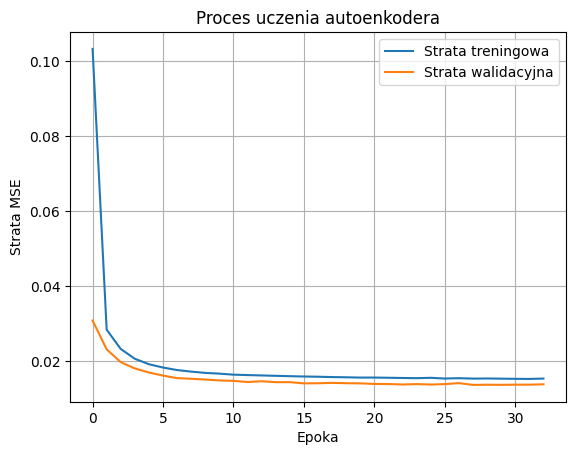

In [ ]:
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata MSE')
plt.title('Proces uczenia autoenkodera')
plt.legend()
plt.grid()
plt.show()

2436/2436 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
605/605 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
9916/9916 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step
2483/2483 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


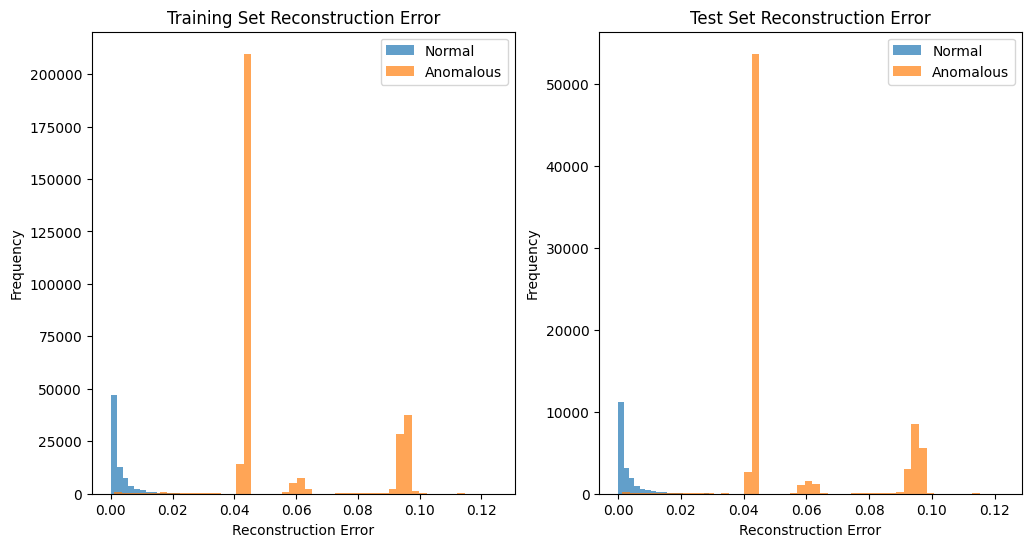

Confusion Matrix:
 [[ 76366   1559]
 [  2066 315225]]


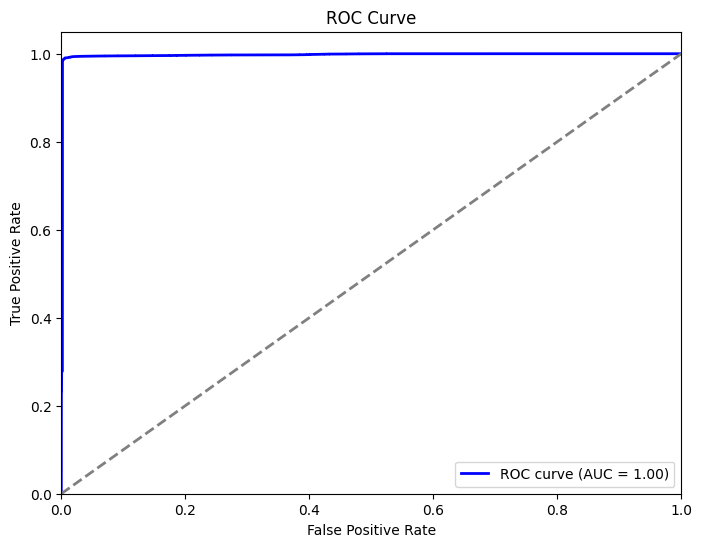

Precision: 0.9951
Recall: 0.9935


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score



train_reconstruction_error_normal = np.mean(np.abs(X_train_normal - autoencoder_3.predict(X_train_normal)), axis=1)
test_reconstruction_error_normal = np.mean(np.abs(X_test_normal - autoencoder_3.predict(X_test_normal)), axis=1)

train_reconstruction_error_anom = np.mean(np.abs(X_train_anom - autoencoder_3.predict(X_train_anom)), axis=1)
test_reconstruction_error_anom = np.mean(np.abs(X_test_anom - autoencoder_3.predict(X_test_anom)), axis=1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(train_reconstruction_error_normal, bins=50, alpha=0.7, label='Normal')
plt.hist(train_reconstruction_error_anom, bins=50, alpha=0.7, label='Anomalous')
plt.title("Training Set Reconstruction Error")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(test_reconstruction_error_normal, bins=50, alpha=0.7, label='Normal')
plt.hist(test_reconstruction_error_anom, bins=50, alpha=0.7, label='Anomalous')
plt.title("Test Set Reconstruction Error")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()

plt.show()


y_true = np.concatenate([np.zeros(len(X_train_normal)), np.ones(len(X_train_anom))])
y_pred = np.concatenate([train_reconstruction_error_normal, train_reconstruction_error_anom])

threshold = np.percentile(train_reconstruction_error_normal, 98)

y_pred_labels = (y_pred > threshold).astype(int)

cm = confusion_matrix(y_true, y_pred_labels)
print("Confusion Matrix:\n", cm)

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

precision = precision_score(y_true, y_pred_labels)
recall = recall_score(y_true, y_pred_labels)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Z poniższych wyników trenowania modeli najlepsze wyniki osiągnął model_3, który trenowany był przy pomocy całego zbioru danych załączonego do zadania(poza kolumnami 'num_outbound_cmds', 'is_host_login', które nie posiadały danych). Proces dostrajania modelu zacząłem od dodania regularyzacji L2, z której wartością należało zachowywać się ostrożnie, ponieważ wartość jej 0.01 jakiej użyłem na początku, powodowała wzrost liczby wykrytych fałszywych negatywnych przypadków. Istotnym elementem okazało się również użycie warstwy wejściowej i wyjściowej z 64 neuronami zamiast 128. Użycie dropoutu z wartością 0.2 ograniczyło przeuczanie się modelu. W procesie dostrajania hiperparametrów oraz budowy architektury modelu największą poprawę efektywności w ostatecznym modelu wniosło użycie "batch normalization"(poprawa o 0.0026 w przypadku precyzji). Był to również sposób w jaki udało się uzyskać tak niską warość val_loss. Ciekawym elementem przebiegu projektu jest porównanie wyników pomiędzy modelem 3 a modelem 2. W przypadku modelu 2 zająłem się ręcznie oczyszczeniem zbioru danych z cech wysoce i niskoskorelowanych. Co prawda w przypadku AE nie jest to wskazane działanie natomiast interesujący jest fakt, że różnica w wynikach końcowych modelu jest niewielka na korzyść modelu_3. Można więc przypuszać, że AE potraktował te dane w podobny, marginalny sposób. Próg odcięcia najlepiej separujący przypadki anomalne od normalnych znajdowałby się dla wartości 0.02-0.03.